# Klasifikasi Media Monitoring

#Import Data

In [3]:
import pandas as pd

data=pd.read_excel("/content/Lembar Kerja 2024.xlsx")
data

,No,Tanggal,Nama Media,Judul,Content Berita,Link,Penulis,"Sentimen (Positif, Negatif)",Kode
0,Januari,2024-01-03 00:00:00,Antara News Lampung,BPS: Nilai ekspor Lampung Januari-November 202...,Bandarlampung (ANTARA) - Badan Pusat Statistik...,https://lampung.antaranews.com/berita/711501/b...,Ruth Intan Sozometa Kanafi,NaN,5.0
1,Januari,2024-01-02 00:00:00,Lampost,"Akhir Tahun 2023, Lampung Alami Inflasi 3,47 P...",-,https://m.lampost.co/berita-akhir-tahun-2023-l...,(link lampost tidak dapat diakses),NaN,1.0
2,Januari,2024-01-02 00:00:00,Lampost,"NTP Lampung di Desember 2023 Naik 1,50 Persen",Badan Pusat Statistik (BPS) Provinsi Lampung m...,https://m.lampost.co/berita-ntp-lampung-di-des...,(link lampost tidak dapat diakses),NaN,7.0
3,Januari,2024-01-02 00:00:00,Kupas Tuntas,"Akhir Tahun 2023, Lampung Alami Inflasi 3,47 P...",Kepala Badan Pusat Statistik (BPS) Provinsi La...,https://kupastuntas.co/2024/01/02/akhir-tahun-...,Erik Handoko,NaN,1.0
4,Januari,2024-01-03 00:00:00,RMOLL Lampung,"Desember 2023, BPS Sebut Inflasi Lampung 3,47 ...",Badan Pusat Statistik (BPS) Lampung merilis pe...,https://www.rmollampung.id/desember-2023-bps-s...,Tuti Nurkhomariyah,NaN,1.0
...,...,...,...,...,...,...,...,...,...
209,Juni,2024-06-03 00:00:00,RMOL Lampung,"Bawang Merah Penyumbang Inflasi Terbesar 0,21 ...",NaN,https://www.rmollampung.id/bawang-merah-penyum...,Tuti Nurkhomariyah,NaN,1.0
210,Juni,2024-06-03 00:00:00,Sinar Lampung,Nilai Tukar Petani Lampung Mei 2024 Naik Signi...,NaN,https://sinarlampung.co/nilai-tukar-petani-lam...,Ilwadi Perkasa,NaN,7.0
211,Juni,2024-06-03 00:00:00,Antara News Lampung,"NTP Lampung naik 2,08 persen di Mei 2024",NaN,https://lampung.antaranews.com/berita/730419/n...,Ruth Intan Sozometa Kanafi,NaN,7.0
212,Juni,2024-06-03 00:00:00,Antara News Lampung,Neraca perdagangan Lampung tercatat surplus 93...,NaN,https://lampung.antaranews.com/berita/730416/n...,Ruth Intan Sozometa Kanafi,NaN,NaN


# Preprocessing

## Drop Kolom 'Sentimen'

In [4]:
data = data.drop('Sentimen (Positif, Negatif)', axis=1)
data

,No,Tanggal,Nama Media,Judul,Content Berita,Link,Penulis,Kode
0,Januari,2024-01-03 00:00:00,Antara News Lampung,BPS: Nilai ekspor Lampung Januari-November 202...,Bandarlampung (ANTARA) - Badan Pusat Statistik...,https://lampung.antaranews.com/berita/711501/b...,Ruth Intan Sozometa Kanafi,5.0
1,Januari,2024-01-02 00:00:00,Lampost,"Akhir Tahun 2023, Lampung Alami Inflasi 3,47 P...",-,https://m.lampost.co/berita-akhir-tahun-2023-l...,(link lampost tidak dapat diakses),1.0
2,Januari,2024-01-02 00:00:00,Lampost,"NTP Lampung di Desember 2023 Naik 1,50 Persen",Badan Pusat Statistik (BPS) Provinsi Lampung m...,https://m.lampost.co/berita-ntp-lampung-di-des...,(link lampost tidak dapat diakses),7.0
3,Januari,2024-01-02 00:00:00,Kupas Tuntas,"Akhir Tahun 2023, Lampung Alami Inflasi 3,47 P...",Kepala Badan Pusat Statistik (BPS) Provinsi La...,https://kupastuntas.co/2024/01/02/akhir-tahun-...,Erik Handoko,1.0
4,Januari,2024-01-03 00:00:00,RMOLL Lampung,"Desember 2023, BPS Sebut Inflasi Lampung 3,47 ...",Badan Pusat Statistik (BPS) Lampung merilis pe...,https://www.rmollampung.id/desember-2023-bps-s...,Tuti Nurkhomariyah,1.0
...,...,...,...,...,...,...,...,...
209,Juni,2024-06-03 00:00:00,RMOL Lampung,"Bawang Merah Penyumbang Inflasi Terbesar 0,21 ...",NaN,https://www.rmollampung.id/bawang-merah-penyum...,Tuti Nurkhomariyah,1.0
210,Juni,2024-06-03 00:00:00,Sinar Lampung,Nilai Tukar Petani Lampung Mei 2024 Naik Signi...,NaN,https://sinarlampung.co/nilai-tukar-petani-lam...,Ilwadi Perkasa,7.0
211,Juni,2024-06-03 00:00:00,Antara News Lampung,"NTP Lampung naik 2,08 persen di Mei 2024",NaN,https://lampung.antaranews.com/berita/730419/n...,Ruth Intan Sozometa Kanafi,7.0
212,Juni,2024-06-03 00:00:00,Antara News Lampung,Neraca perdagangan Lampung tercatat surplus 93...,NaN,https://lampung.antaranews.com/berita/730416/n...,Ruth Intan Sozometa Kanafi,NaN


## Missing Values

In [5]:
data.count()


No                214
Tanggal           214
Nama Media        214
Judul             214
Content Berita    200
Link              214
Penulis           170
Kode              213
dtype: int64

In [6]:
data['Penulis'].isnull().sum()

44

In [7]:
import pandas as pd
data['Penulis'].fillna('Tidak Diketahui', inplace=True)
data


,No,Tanggal,Nama Media,Judul,Content Berita,Link,Penulis,Kode
0,Januari,2024-01-03 00:00:00,Antara News Lampung,BPS: Nilai ekspor Lampung Januari-November 202...,Bandarlampung (ANTARA) - Badan Pusat Statistik...,https://lampung.antaranews.com/berita/711501/b...,Ruth Intan Sozometa Kanafi,5.0
1,Januari,2024-01-02 00:00:00,Lampost,"Akhir Tahun 2023, Lampung Alami Inflasi 3,47 P...",-,https://m.lampost.co/berita-akhir-tahun-2023-l...,(link lampost tidak dapat diakses),1.0
2,Januari,2024-01-02 00:00:00,Lampost,"NTP Lampung di Desember 2023 Naik 1,50 Persen",Badan Pusat Statistik (BPS) Provinsi Lampung m...,https://m.lampost.co/berita-ntp-lampung-di-des...,(link lampost tidak dapat diakses),7.0
3,Januari,2024-01-02 00:00:00,Kupas Tuntas,"Akhir Tahun 2023, Lampung Alami Inflasi 3,47 P...",Kepala Badan Pusat Statistik (BPS) Provinsi La...,https://kupastuntas.co/2024/01/02/akhir-tahun-...,Erik Handoko,1.0
4,Januari,2024-01-03 00:00:00,RMOLL Lampung,"Desember 2023, BPS Sebut Inflasi Lampung 3,47 ...",Badan Pusat Statistik (BPS) Lampung merilis pe...,https://www.rmollampung.id/desember-2023-bps-s...,Tuti Nurkhomariyah,1.0
...,...,...,...,...,...,...,...,...
209,Juni,2024-06-03 00:00:00,RMOL Lampung,"Bawang Merah Penyumbang Inflasi Terbesar 0,21 ...",NaN,https://www.rmollampung.id/bawang-merah-penyum...,Tuti Nurkhomariyah,1.0
210,Juni,2024-06-03 00:00:00,Sinar Lampung,Nilai Tukar Petani Lampung Mei 2024 Naik Signi...,NaN,https://sinarlampung.co/nilai-tukar-petani-lam...,Ilwadi Perkasa,7.0
211,Juni,2024-06-03 00:00:00,Antara News Lampung,"NTP Lampung naik 2,08 persen di Mei 2024",NaN,https://lampung.antaranews.com/berita/730419/n...,Ruth Intan Sozometa Kanafi,7.0
212,Juni,2024-06-03 00:00:00,Antara News Lampung,Neraca perdagangan Lampung tercatat surplus 93...,NaN,https://lampung.antaranews.com/berita/730416/n...,Ruth Intan Sozometa Kanafi,NaN


In [8]:
data['Penulis'].isnull().sum()

0

In [9]:
data['Kode'].isnull().sum()

1

In [10]:
import pandas as pd
data['Kode'].fillna(1, inplace=True)
data


,No,Tanggal,Nama Media,Judul,Content Berita,Link,Penulis,Kode
0,Januari,2024-01-03 00:00:00,Antara News Lampung,BPS: Nilai ekspor Lampung Januari-November 202...,Bandarlampung (ANTARA) - Badan Pusat Statistik...,https://lampung.antaranews.com/berita/711501/b...,Ruth Intan Sozometa Kanafi,5.0
1,Januari,2024-01-02 00:00:00,Lampost,"Akhir Tahun 2023, Lampung Alami Inflasi 3,47 P...",-,https://m.lampost.co/berita-akhir-tahun-2023-l...,(link lampost tidak dapat diakses),1.0
2,Januari,2024-01-02 00:00:00,Lampost,"NTP Lampung di Desember 2023 Naik 1,50 Persen",Badan Pusat Statistik (BPS) Provinsi Lampung m...,https://m.lampost.co/berita-ntp-lampung-di-des...,(link lampost tidak dapat diakses),7.0
3,Januari,2024-01-02 00:00:00,Kupas Tuntas,"Akhir Tahun 2023, Lampung Alami Inflasi 3,47 P...",Kepala Badan Pusat Statistik (BPS) Provinsi La...,https://kupastuntas.co/2024/01/02/akhir-tahun-...,Erik Handoko,1.0
4,Januari,2024-01-03 00:00:00,RMOLL Lampung,"Desember 2023, BPS Sebut Inflasi Lampung 3,47 ...",Badan Pusat Statistik (BPS) Lampung merilis pe...,https://www.rmollampung.id/desember-2023-bps-s...,Tuti Nurkhomariyah,1.0
...,...,...,...,...,...,...,...,...
209,Juni,2024-06-03 00:00:00,RMOL Lampung,"Bawang Merah Penyumbang Inflasi Terbesar 0,21 ...",NaN,https://www.rmollampung.id/bawang-merah-penyum...,Tuti Nurkhomariyah,1.0
210,Juni,2024-06-03 00:00:00,Sinar Lampung,Nilai Tukar Petani Lampung Mei 2024 Naik Signi...,NaN,https://sinarlampung.co/nilai-tukar-petani-lam...,Ilwadi Perkasa,7.0
211,Juni,2024-06-03 00:00:00,Antara News Lampung,"NTP Lampung naik 2,08 persen di Mei 2024",NaN,https://lampung.antaranews.com/berita/730419/n...,Ruth Intan Sozometa Kanafi,7.0
212,Juni,2024-06-03 00:00:00,Antara News Lampung,Neraca perdagangan Lampung tercatat surplus 93...,NaN,https://lampung.antaranews.com/berita/730416/n...,Ruth Intan Sozometa Kanafi,1.0


In [11]:
data['Kode'].isnull().sum()

0

## Encoding

In [12]:
mapping = {1: 'Inflasi/Harga', 2: 'Kemiskinan', 3: 'Pengangguran/Ketenagakerjaan ',
           4: 'Pertumbuhan Ekonomi', 5:'Ekspor/Impor', 6:'Produksi Pertanian',
           7:'Nilai Tukar Petani', 8:'Kependudukan',
           9:'Gini Ratio', 10:'Kesehatan',11:'Pendidikan', 12:'Pariwisata',
           13:'Transportasi',14:'Indeks Pembangunan Manusia', 15:'Politik',
           16:'Korupsi/Indeks Persepsi Anti Korupsi', 17:'Sensus Penduduk 2020',
           18:'Sensus Pertanian 2023',19:'ITK/ITB',20:'Teknologi Informasi',
           21:'Even/Kegiatan BPS',22:'Industri Besar/Sedang',23:'Lain-lain',
           24:'Konsumsi Rumah Tangga',25:'Potensi Desa',26:'Lingkungan Hidup',
           27:'Desa Cantik',28:'Satu Data Indonesia',29:'Pasar Uang/Pasar Modal/LK Lainnya',
           30:'Investasi Fisik/PMTB',31:'Upah Tenaga Kerja',32:'Ekonomi Regional',
           33:'Pandemi Covid 19',34:'Gender',35:'Pertambangan dan Energi',36:'Perpajakan',
           37:'UMKM', 38:'Indeks Kebahagiaan',39:'E-commerce',40:'Kriminalitas/Keamanan',
           41:'Keuangan Negara/APBN',42:'Kebudayaan',43:'Ekonomi Makro',44:'Difabel',
           45:'Regsosek',46:'Agama',47:'Sosial'}
data['Kode'] = data['Kode'].replace(mapping)
data


,No,Tanggal,Nama Media,Judul,Content Berita,Link,Penulis,Kode
0,Januari,2024-01-03 00:00:00,Antara News Lampung,BPS: Nilai ekspor Lampung Januari-November 202...,Bandarlampung (ANTARA) - Badan Pusat Statistik...,https://lampung.antaranews.com/berita/711501/b...,Ruth Intan Sozometa Kanafi,Ekspor/Impor
1,Januari,2024-01-02 00:00:00,Lampost,"Akhir Tahun 2023, Lampung Alami Inflasi 3,47 P...",-,https://m.lampost.co/berita-akhir-tahun-2023-l...,(link lampost tidak dapat diakses),Inflasi/Harga
2,Januari,2024-01-02 00:00:00,Lampost,"NTP Lampung di Desember 2023 Naik 1,50 Persen",Badan Pusat Statistik (BPS) Provinsi Lampung m...,https://m.lampost.co/berita-ntp-lampung-di-des...,(link lampost tidak dapat diakses),Nilai Tukar Petani
3,Januari,2024-01-02 00:00:00,Kupas Tuntas,"Akhir Tahun 2023, Lampung Alami Inflasi 3,47 P...",Kepala Badan Pusat Statistik (BPS) Provinsi La...,https://kupastuntas.co/2024/01/02/akhir-tahun-...,Erik Handoko,Inflasi/Harga
4,Januari,2024-01-03 00:00:00,RMOLL Lampung,"Desember 2023, BPS Sebut Inflasi Lampung 3,47 ...",Badan Pusat Statistik (BPS) Lampung merilis pe...,https://www.rmollampung.id/desember-2023-bps-s...,Tuti Nurkhomariyah,Inflasi/Harga
...,...,...,...,...,...,...,...,...
209,Juni,2024-06-03 00:00:00,RMOL Lampung,"Bawang Merah Penyumbang Inflasi Terbesar 0,21 ...",NaN,https://www.rmollampung.id/bawang-merah-penyum...,Tuti Nurkhomariyah,Inflasi/Harga
210,Juni,2024-06-03 00:00:00,Sinar Lampung,Nilai Tukar Petani Lampung Mei 2024 Naik Signi...,NaN,https://sinarlampung.co/nilai-tukar-petani-lam...,Ilwadi Perkasa,Nilai Tukar Petani
211,Juni,2024-06-03 00:00:00,Antara News Lampung,"NTP Lampung naik 2,08 persen di Mei 2024",NaN,https://lampung.antaranews.com/berita/730419/n...,Ruth Intan Sozometa Kanafi,Nilai Tukar Petani
212,Juni,2024-06-03 00:00:00,Antara News Lampung,Neraca perdagangan Lampung tercatat surplus 93...,NaN,https://lampung.antaranews.com/berita/730416/n...,Ruth Intan Sozometa Kanafi,Inflasi/Harga


In [13]:
data.count()

No                214
Tanggal           214
Nama Media        214
Judul             214
Content Berita    200
Link              214
Penulis           214
Kode              214
dtype: int64

# Klasifikasi

## Tren pergerakan pemberitaan BPS Januari-Juni 2024

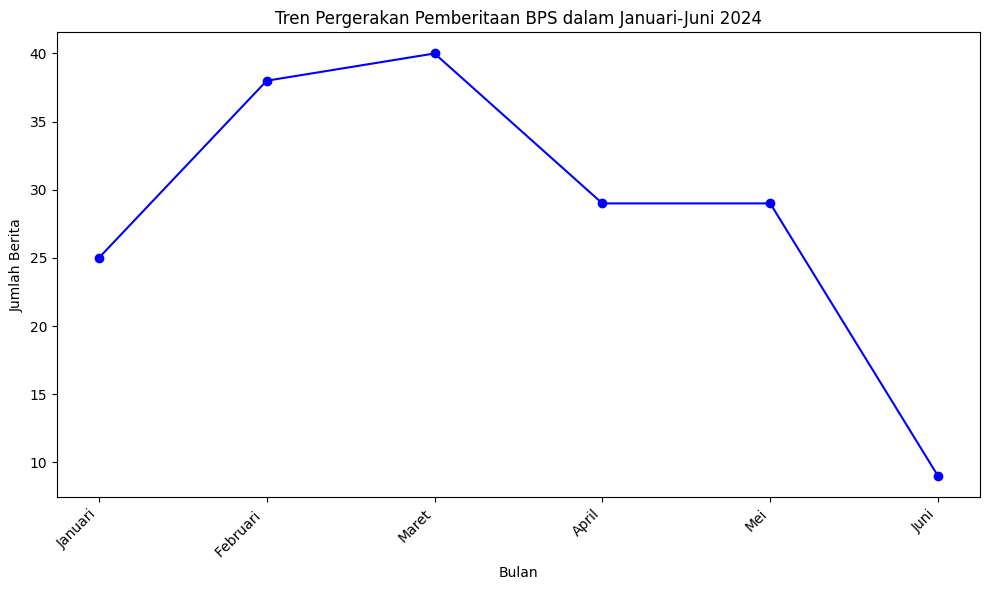

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

news_per_month = data.groupby('No')['Kode'].count().sort_values(ascending=False)
bulan_berurutan = ['Januari', 'Februari ', 'Maret', 'April', 'Mei', 'Juni']
news_per_month = news_per_month[bulan_berurutan]

plt.figure(figsize=(10, 6))
plt.plot(news_per_month.index, news_per_month.values, color='blue', marker='o', linestyle='-')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Berita')
plt.title('Tren Pergerakan Pemberitaan BPS dalam Januari-Juni 2024')
plt.xticks(rotation=45, ha='right')
#plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [55]:
data['No'].value_counts()

No
Maret        40
Februari     38
April        29
Mei          29
Januari      25
Juni          9
Name: count, dtype: int64

## Media Terbanyak melakukan pemberitaan Data BPS

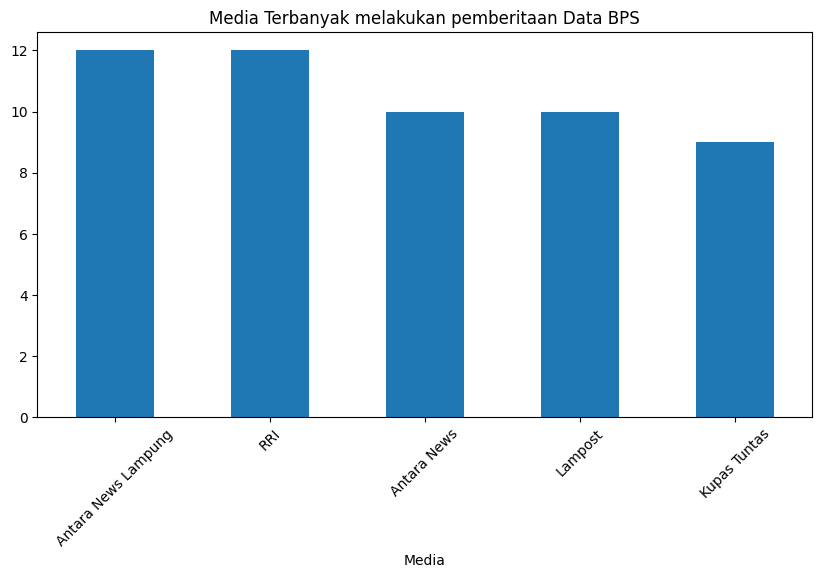

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
media = data['Nama Media'].value_counts()
top_5_media = media.head(5)
plt.figure(figsize=(10, 5))
top_5_media.plot(kind='bar')
plt.title('Media Terbanyak melakukan pemberitaan Data BPS')
plt.xlabel('Media')
#plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45)

plt.show()



In [57]:
data['Nama Media'].value_counts()

Nama Media
Antara News Lampung    12
RRI                    12
Antara News            10
Lampost                10
Kupas Tuntas            9
                       ..
NU Online Lampung       1
Berdikari.co            1
WartaViral Id           1
PEP News                1
Kompas com              1
Name: count, Length: 70, dtype: int64

## Persentase Media terbanyak pemberitaan Data BPS

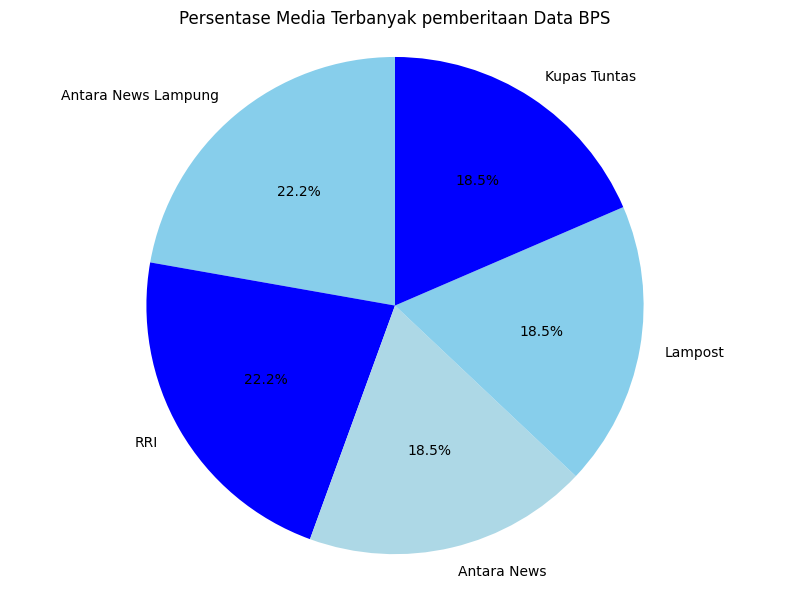

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

media = data['Nama Media'].value_counts()
media= media.head(5)

plt.figure(figsize=(8, 6))
plt.pie(media, labels=media.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'blue', 'lightblue'])
plt.axis('equal')

plt.title('Persentase Media Terbanyak pemberitaan Data BPS')

plt.tight_layout()
plt.show()


## Penulis Pemberitaan Data BPS Terbanyak

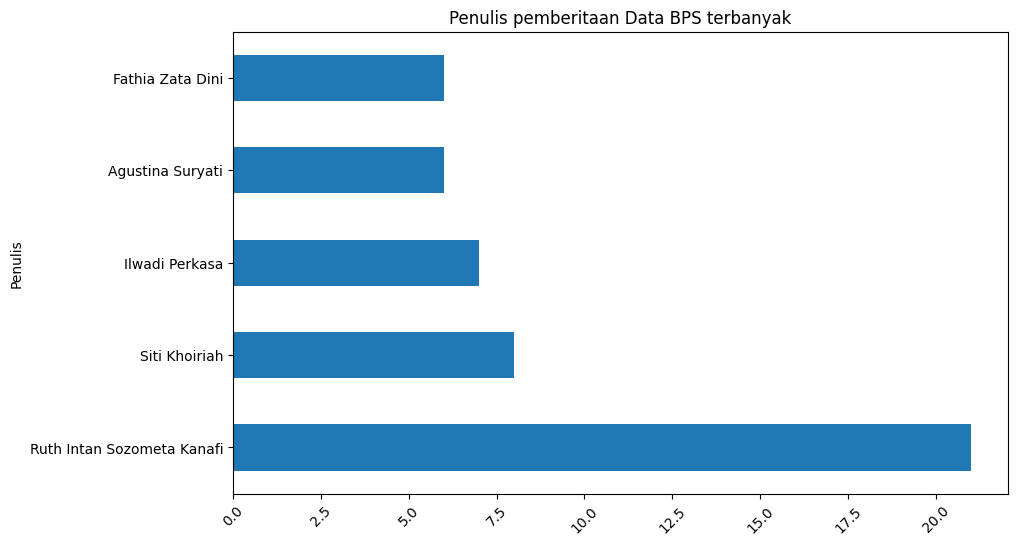

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
data = data.drop(data[data['Penulis'] == 'Tidak Diketahui'].index)
penulis = data['Penulis'].value_counts()
penulis= penulis.head(5)
plt.figure(figsize=(10, 6))
penulis.plot(kind='barh')
plt.title('Penulis pemberitaan Data BPS terbanyak')
#plt.ylabel('Isu')
#plt.xlabel('Jumlah Kemunculan')
plt.xticks(rotation=45)

plt.show()

## Persentase Penulis Pemberitaan Data BPS Terbanyak

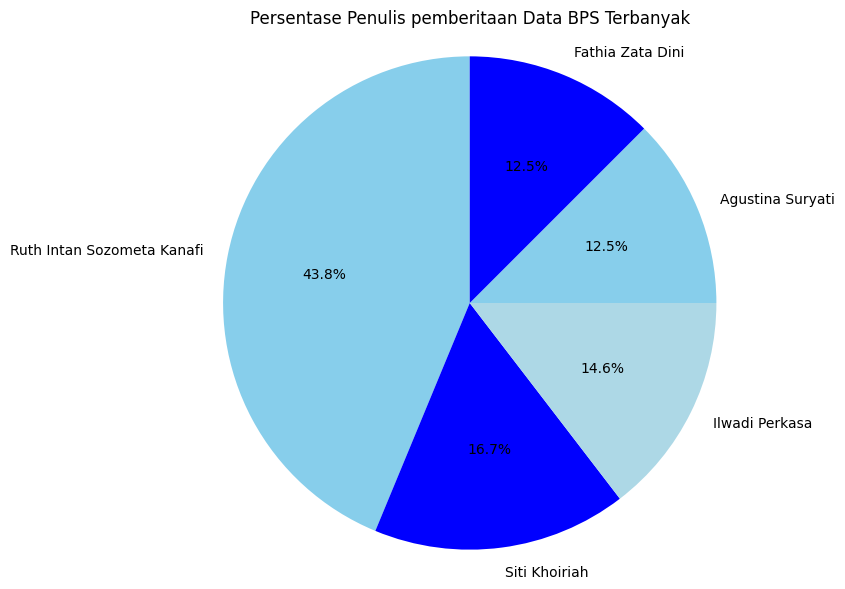

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
data = data.drop(data[data['Penulis'] == 'Tidak Diketahui'].index)
penulis= data['Penulis'].value_counts()
penulis= penulis.head(5)


plt.figure(figsize=(8, 6))
plt.pie(penulis, labels=penulis.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'blue', 'lightblue'])
plt.axis('equal')

plt.title('Persentase Penulis pemberitaan Data BPS Terbanyak')
plt.tight_layout()
plt.show()

data['Penulis'].value_counts()

In [56]:
data['Penulis'].value_counts()

Penulis
Ruth Intan Sozometa Kanafi    21
Siti Khoiriah                  8
Ilwadi Perkasa                 7
Agustina Suryati               6
Fathia Zata Dini               6
                              ..
Feaby Handana                  1
Bayu Loewesing Satria          1
Sigit Pamungkas                1
Joni Efriadi                   1
 Tuti Nurkhomariyah            1
Name: count, Length: 81, dtype: int64

## Persentase Isu Terbanyak pemberitaan Data BPS

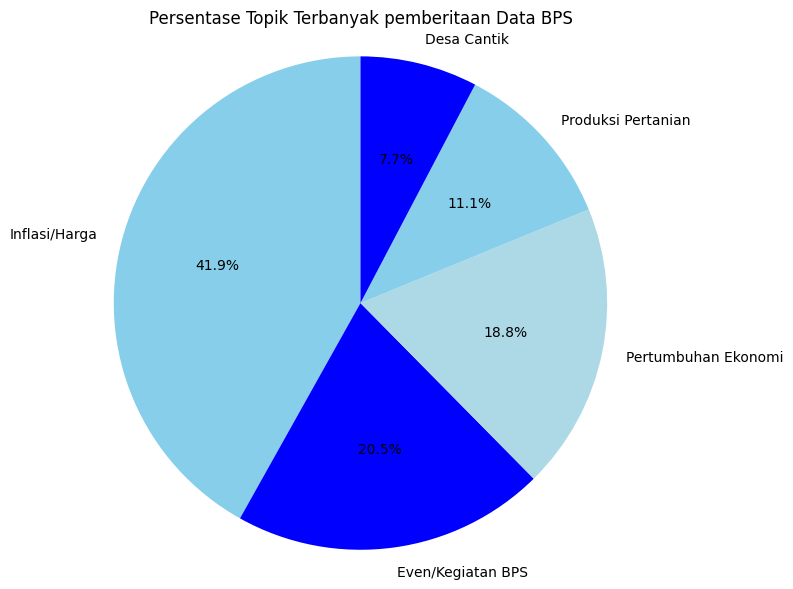

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

kode = data['Kode'].value_counts()
kode= kode.head(5)

plt.figure(figsize=(8, 6))
plt.pie(kode, labels=kode.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'blue', 'lightblue'])
plt.axis('equal')

plt.title('Persentase Topik Terbanyak pemberitaan Data BPS')

plt.tight_layout()
plt.show()


In [58]:
data['Kode'].value_counts()

Kode
Inflasi/Harga                    49
Even/Kegiatan BPS                24
Pertumbuhan Ekonomi              22
Produksi Pertanian               13
Desa Cantik                       9
Nilai Tukar Petani                9
Ekspor/Impor                      7
Teknologi Informasi               6
Lain-lain                         5
Kependudukan                      5
Pendidikan                        5
Kemiskinan                        3
Industri Besar/Sedang             3
Pengangguran/Ketenagakerjaan      3
Indeks Pembangunan Manusia        2
Ekonomi Regional                  2
Politik                           2
Transportasi                      1
Name: count, dtype: int64

## Jumlah Isu Pemberitaan Data BPS dimasing-masing isu

In [21]:
data['Kode'].unique()

array(['Ekspor/Impor', 'Inflasi/Harga', 'Nilai Tukar Petani', 'Lain-lain',
       'Kependudukan', 'Politik', 'Even/Kegiatan BPS',
       'Produksi Pertanian', 'Pertumbuhan Ekonomi',
       'Industri Besar/Sedang', 'Ekonomi Regional', 'Transportasi',
       'Desa Cantik', 'Pendidikan', 'Indeks Pembangunan Manusia',
       'Kemiskinan', 'Teknologi Informasi',
       'Pengangguran/Ketenagakerjaan '], dtype=object)

In [22]:
import matplotlib as plt
import seaborn as sns

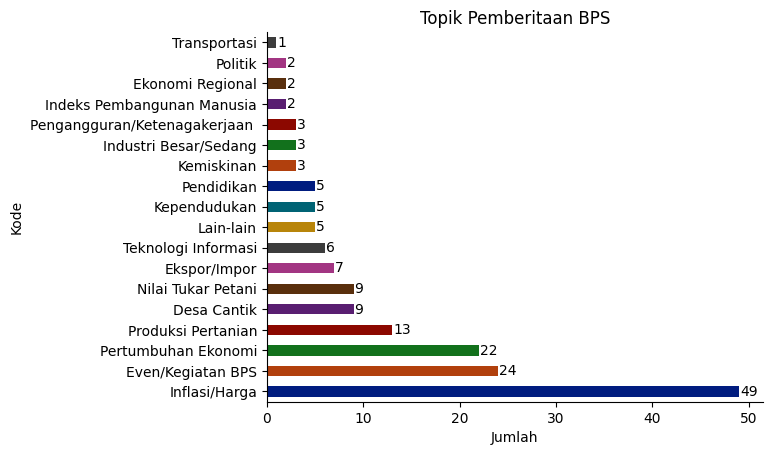

In [38]:
#plt.figure(figsize=(10, 8))
ax = data['Kode'].value_counts().plot(kind='barh', color= sns.color_palette('dark'))

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), va='center')

# Removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Display the plot
plt.xlabel('Jumlah')
plt.title('Topik Pemberitaan BPS')
plt.show()

## Isu Terbanyak Pemberitaan Data BPS

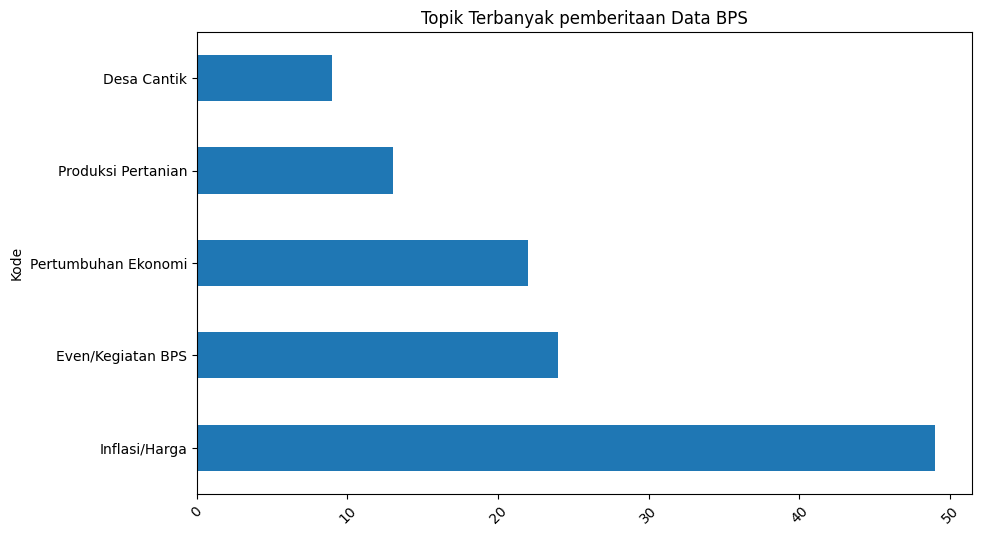

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
kode = data['Kode'].value_counts()
kode= kode.head(5)
plt.figure(figsize=(10, 6))
kode.plot(kind='barh')
plt.title('Topik Terbanyak pemberitaan Data BPS')
#plt.ylabel('Isu')
#plt.xlabel('Jumlah Kemunculan')
plt.xticks(rotation=45)
plt.show()


In [39]:
data['Kode'].value_counts()

Kode
Inflasi/Harga                    49
Even/Kegiatan BPS                24
Pertumbuhan Ekonomi              22
Produksi Pertanian               13
Desa Cantik                       9
Nilai Tukar Petani                9
Ekspor/Impor                      7
Teknologi Informasi               6
Lain-lain                         5
Kependudukan                      5
Pendidikan                        5
Kemiskinan                        3
Industri Besar/Sedang             3
Pengangguran/Ketenagakerjaan      3
Indeks Pembangunan Manusia        2
Ekonomi Regional                  2
Politik                           2
Transportasi                      1
Name: count, dtype: int64

## Jumlah Isu Pemberitaan Data BPS per bulan

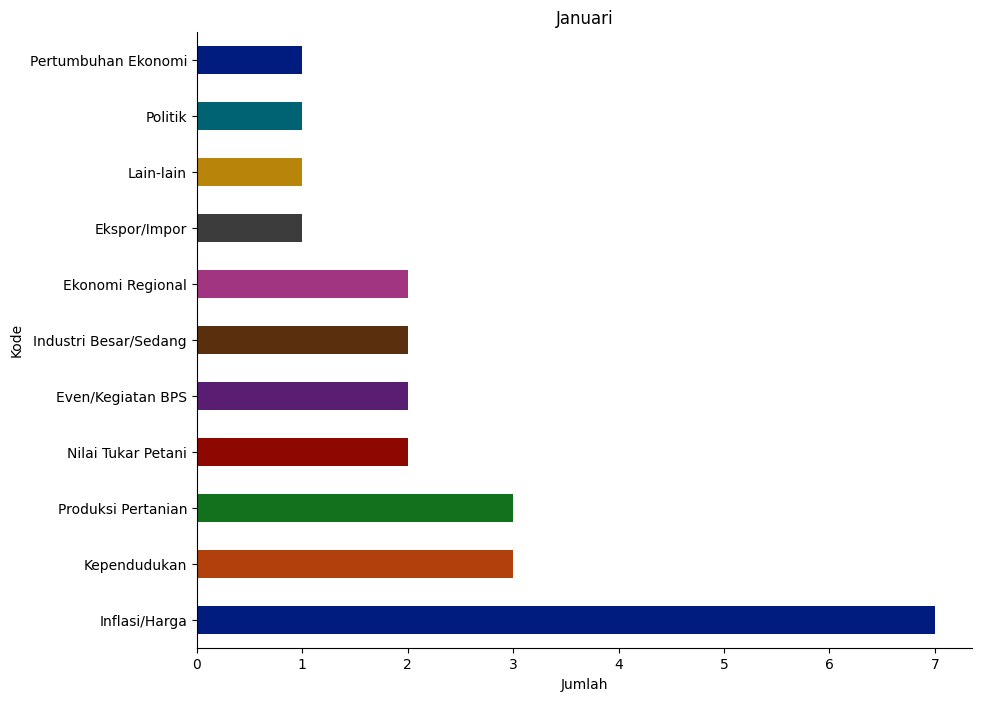

In [26]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 8))
januari_data = data[data['No'] == 'Januari']
januari_data['Kode'].value_counts().plot(kind='barh', color=sns.color_palette('dark'))
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), va='center')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Jumlah')
plt.title('Januari')
plt.show()

In [27]:
januari_data['Kode'].count()

25

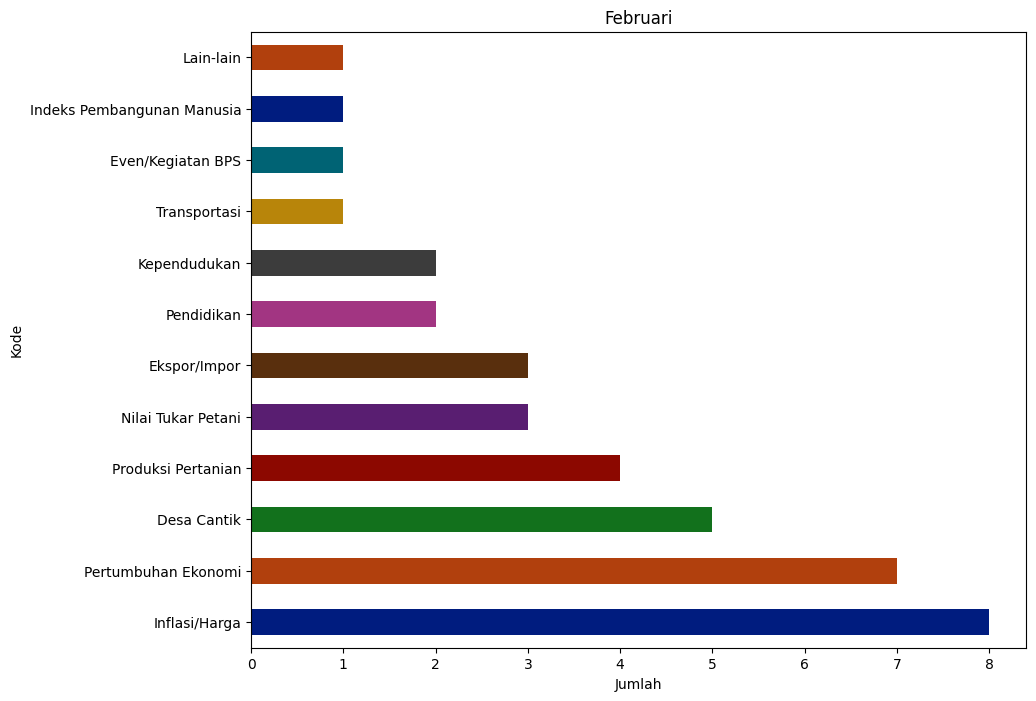

In [28]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 8))
feb_data = data[data['No'] == 'Februari ']
feb_data['Kode'].value_counts().plot(kind='barh', color=sns.color_palette('dark'))
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2), va='center', ha='center')
plt.xlabel('Jumlah')
plt.title('Februari')
plt.show()


In [29]:
feb_data['Kode'].count()

38

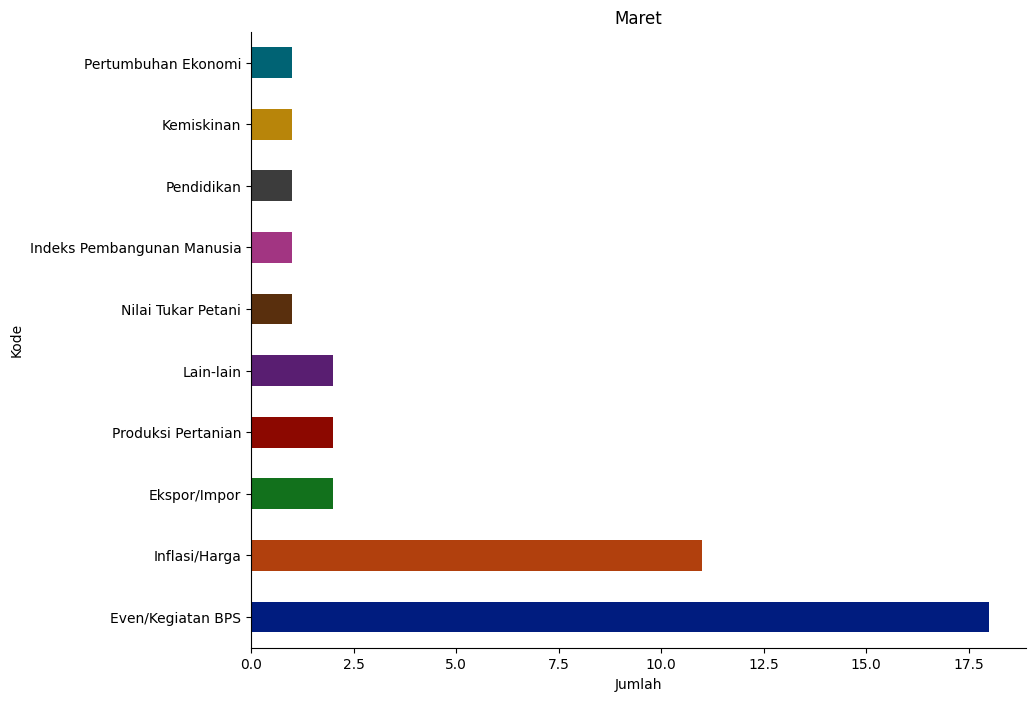

In [53]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 8))
mar_data = data[data['No'] == 'Maret']
mar_data['Kode'].value_counts().plot(kind='barh', color=sns.color_palette('dark'))

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height()* 0.1), va='bottom', ha='center')

#for p in ax.patches:
#    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2), va='center', ha='center')
#for p in ax.patches:
#    ax.annotate(
#        str(p.get_width()),
#        (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2.5),
##        va="center",
#        ha="center",
#    )

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Jumlah')
plt.title('Maret')
plt.show()

In [31]:
data[data['No'] == 'Maret'].count()

No                40
Tanggal           40
Nama Media        40
Judul             40
Content Berita    40
Link              40
Penulis           40
Kode              40
dtype: int64

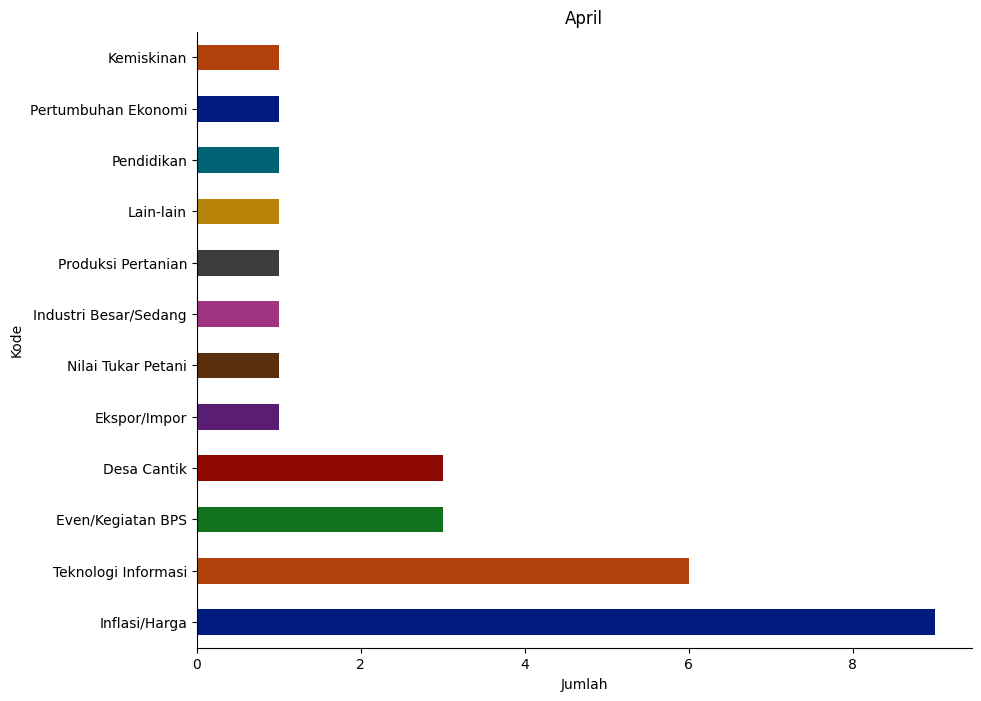

In [32]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 8))
apr_data = data[data['No'] == 'April']
apr_data['Kode'].value_counts().plot(kind='barh', color=sns.color_palette('dark'))

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() * 0.1), va='bottom', ha='center')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Jumlah')
plt.title('April')
plt.show()

In [33]:
apr_data['Kode'].count()

29

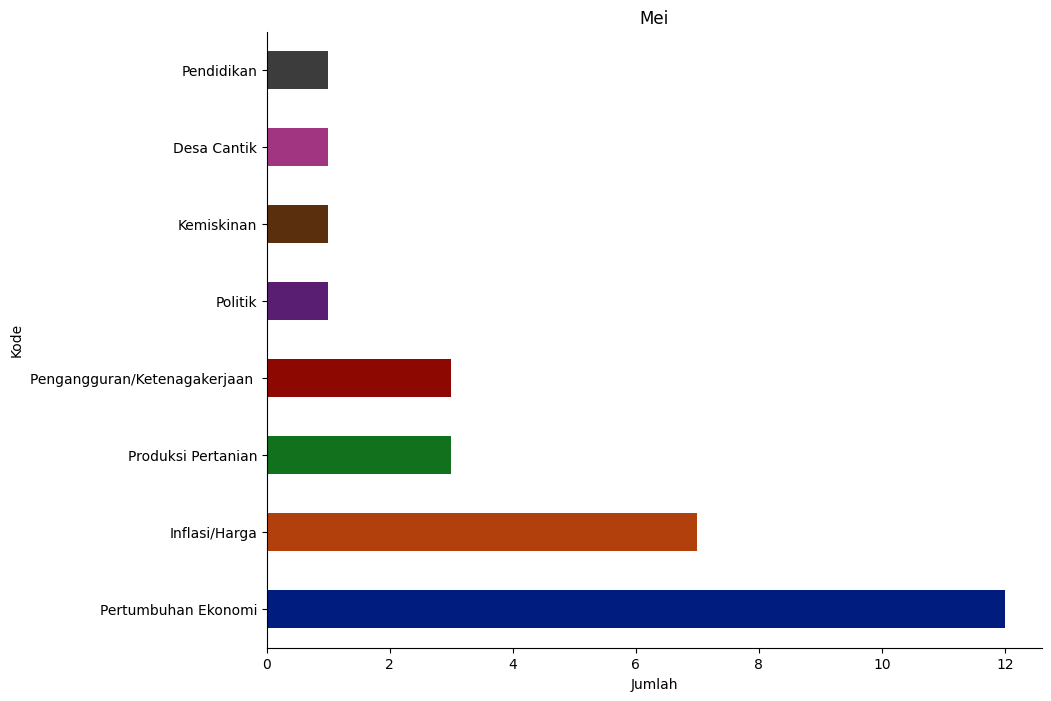

In [34]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 8))
mei_data = data[data['No'] == 'Mei']
mei_data['Kode'].value_counts().plot(kind='barh', color=sns.color_palette('dark'))

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() * 0.1), va='bottom', ha='center')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Jumlah')
plt.title('Mei')
plt.show()

In [35]:
mei_data['Kode'].count()

29

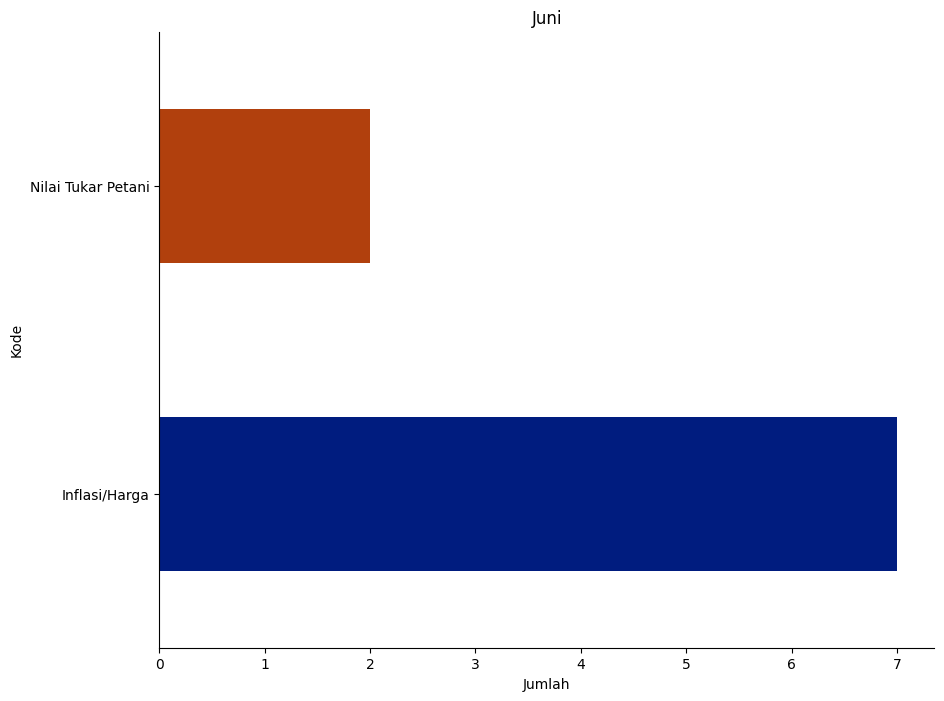

In [36]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 8))
juni_data = data[data['No'] == 'Juni']
juni_data['Kode'].value_counts().plot(kind='barh', color=sns.color_palette('dark'))

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() * 0.1), va='bottom', ha='center')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Jumlah')
plt.title('Juni')
plt.show()


In [37]:
juni_data['Kode'].count()

9